#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

In [1]:
import pandas as pd

titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [2]:
strCols  = ['name', "sex",'cabin','embarked','ticket']

titanicNum = titanic.drop(strCols,axis=1)

<Axes: >

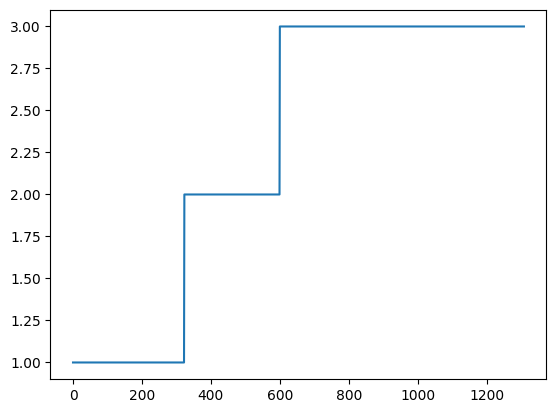

In [3]:
titanicNum['pclass'].plot()

<Axes: >

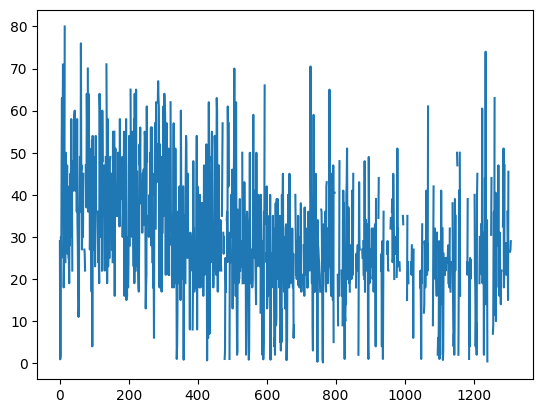

In [4]:
titanicNum['age'].plot()

<Axes: >

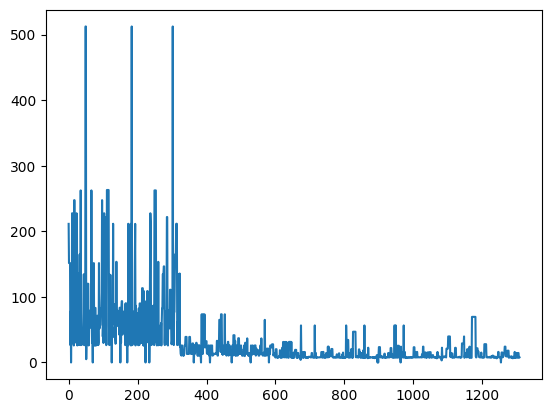

In [5]:
titanicNum['fare'].plot()

<Axes: >

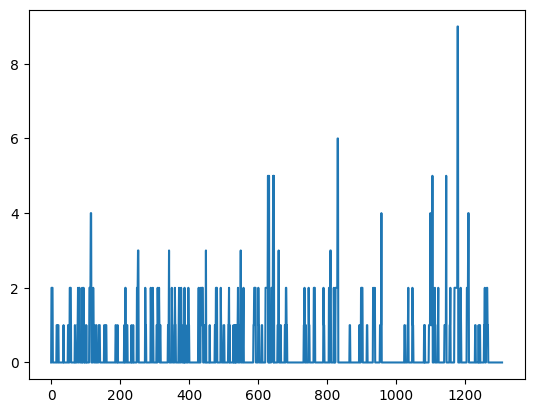

In [6]:
titanicNum['parch'].plot()

<Axes: >

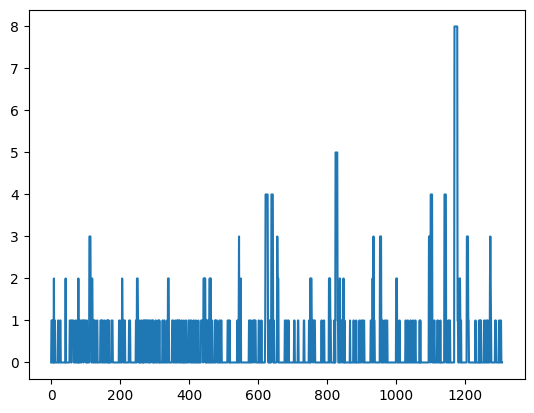

In [7]:
titanicNum['sibsp'].plot()

<Axes: >

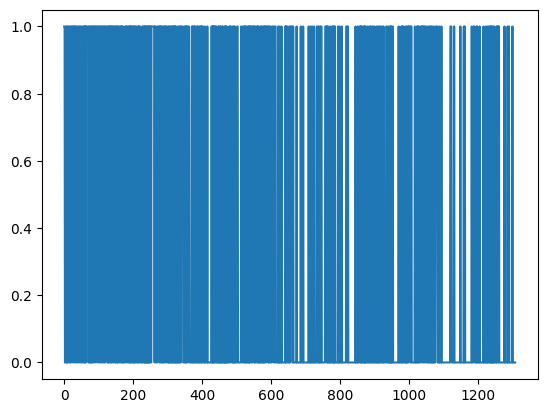

In [8]:
titanicNum['survived'].plot()

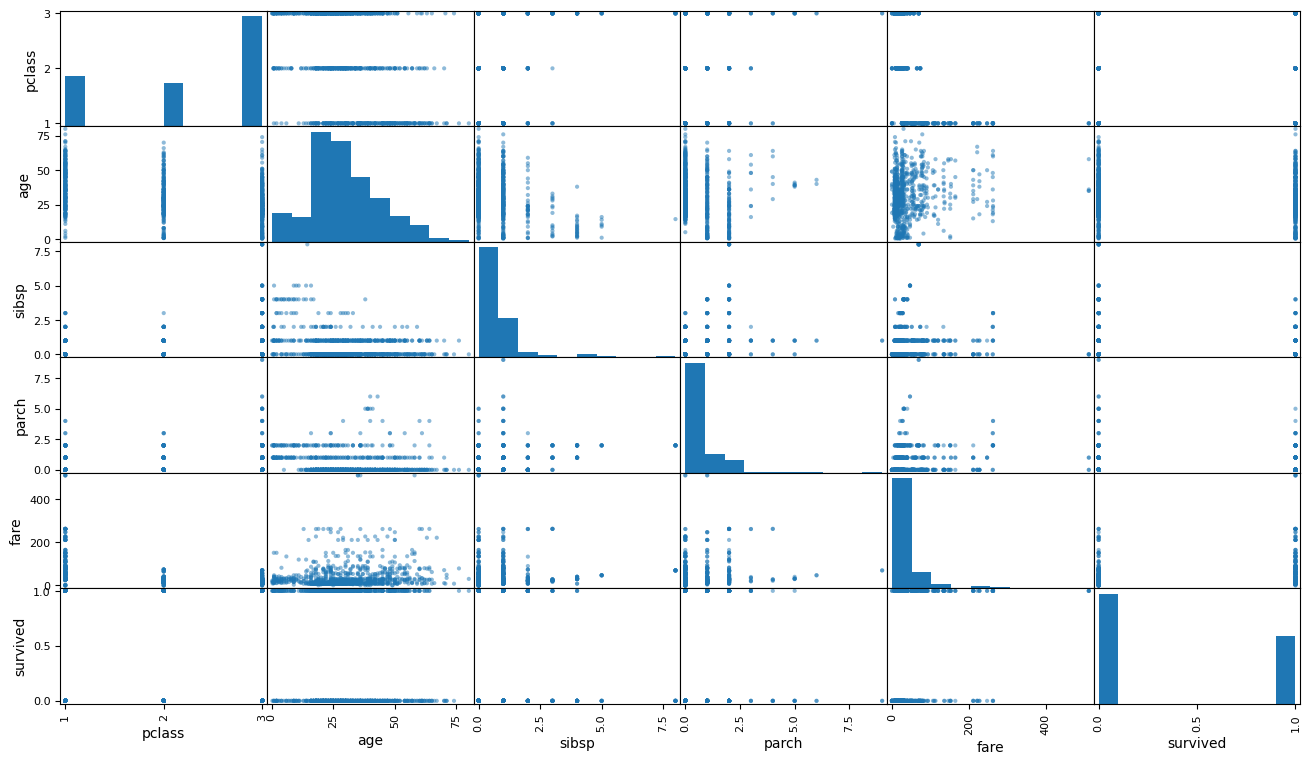

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv("data/titanic.csv")
pd.plotting.scatter_matrix(titanic,figsize=(16,9))
plt.show()

#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

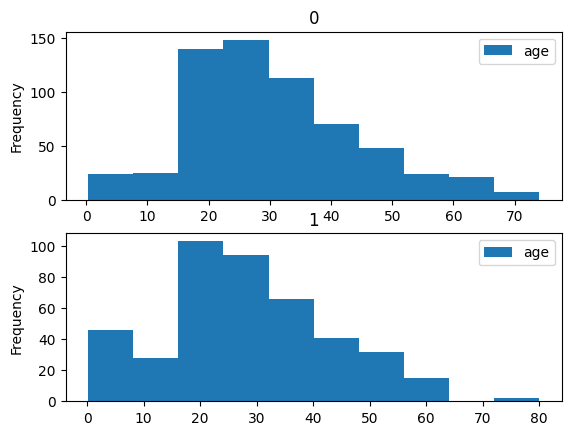

In [10]:
titanicNum[['age','survived']].plot.hist(by="survived")

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

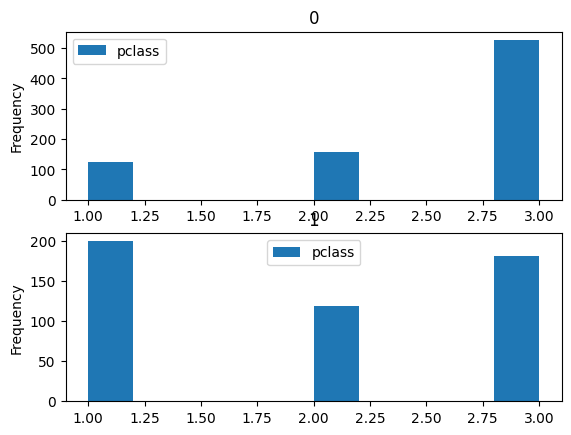

In [11]:
titanicNum[['pclass','survived']].plot.hist(by="survived")

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

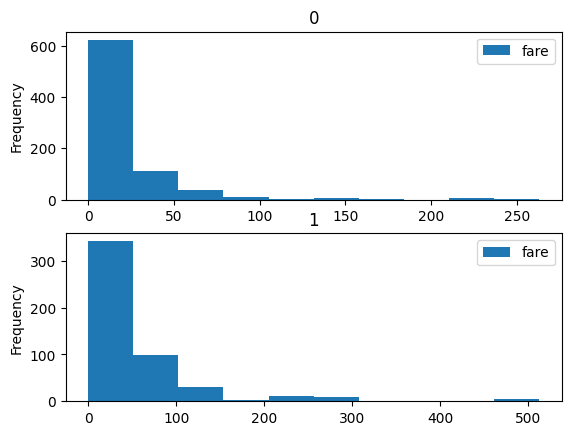

In [12]:
titanicNum[['fare','survived']].plot.hist(by="survived")

array([<Axes: title={'center': 'False'}, ylabel='Frequency'>,
       <Axes: title={'center': 'True'}, ylabel='Frequency'>], dtype=object)

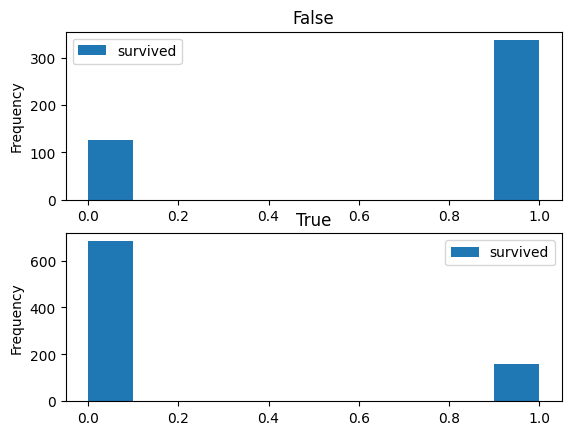

In [13]:
titanic1 = pd.concat([titanic,pd.get_dummies(titanic[['sex']],drop_first=True)],axis=1)
titanic1[["sex_male","survived"]].plot.hist(by="sex_male")

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [14]:
titanic.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

<Axes: >

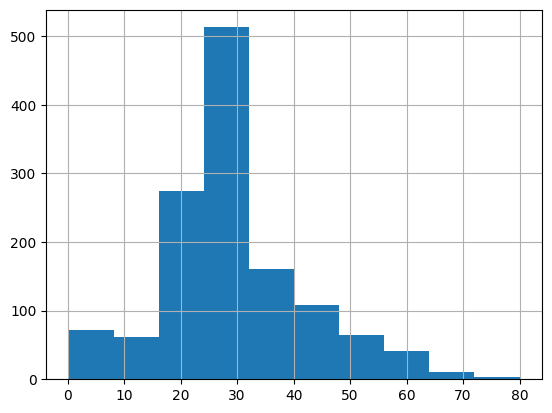

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# either work
#x = imputer.fit_transform(titanic.age.to_numpy().reshape((-1,1)))
x = imputer.fit_transform(titanic[['age']])

titanic['age'] = x[:,0]
titanic.age.hist()

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanicClean = titanic.drop(['name','ticket','fare','cabin','embarked'],axis=1)
titanicClean['sex'] = le.fit_transform(titanic[['sex']])
titanicClean

/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pclass,sex,age,sibsp,parch,survived
0,1,0,29.0000,0,0,1
1,1,1,0.9167,1,2,1
2,1,0,2.0000,1,2,0
3,1,1,30.0000,1,2,0
4,1,0,25.0000,1,2,0
...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,0
1305,3,0,28.0000,1,0,0
1306,3,1,26.5000,0,0,0
1307,3,1,27.0000,0,0,0


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

_Note, the following exercises use the housing data introduced in this week's lecture notes._

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np 
lm = LogisticRegression()
x = titanicClean[['sex','age','pclass','sibsp','parch']]
y = titanicClean[['survived']]

result = cross_val_score(lm,x,y,cv=5)
np.mean(result)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

0.7096721359422069

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
x = titanicClean[['sex','age','pclass','sibsp','parch']]
y = titanicClean[['survived']]

result = cross_val_score(dt,x,y,cv=5)
np.mean(result)

0.6371355034950719

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.